## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Please download the dataset from the below url

In [ ]:
import tensorflow as tf
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Train_set'
valid_path = '/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Validation_set'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Train_set/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Train_set',
                                                 target_size = (224, 224),
                                                 batch_size = 8,
                                                 class_mode = 'categorical')

Found 299 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Test_set',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 50 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-52-69229fe26ea3>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/50
38/38 [==============================] - 101s 3s/step - loss: 7.9267 - accuracy: 0.1237 - val_loss: 6.5979 - val_accuracy: 0.1000
Epoch 2/50
38/38 [==============================] - 93s 2s/step - loss: 4.9987 - accuracy: 0.1204 - val_loss: 4.0563 - val_accuracy: 0.1200
Epoch 3/50
38/38 [==============================] - 93s 2s/step - loss: 4.4523 - accuracy: 0.1873 - val_loss: 4.7808 - val_accuracy: 0.2400
Epoch 4/50
38/38 [==============================] - 86s 2s/step - loss: 5.1175 - accuracy: 0.1505 - val_loss: 4.2853 - val_accuracy: 0.2400
Epoch 5/50
38/38 [==============================] - 92s 2s/step - loss: 3.4587 - accuracy: 0.2375 - val_loss: 3.3017 - val_accuracy: 0.1600
Epoch 6/50
38/38 [==============================] - 94s 2s/step - loss: 3.4489 - accuracy: 0.2241 - val_loss: 2.3357 - val_accuracy: 0.2600
Epoch 7/50
38/38 [==============================] - 93s 2s/step - loss: 3.0904 - accuracy: 0.3110 - val_loss: 2.6439 - val_accuracy: 0.3400
Epoch 8/50
38/38 [=

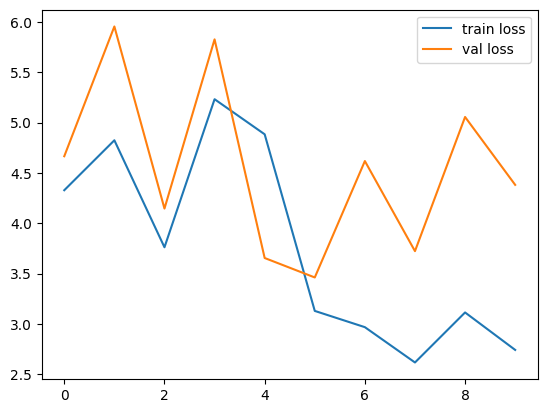

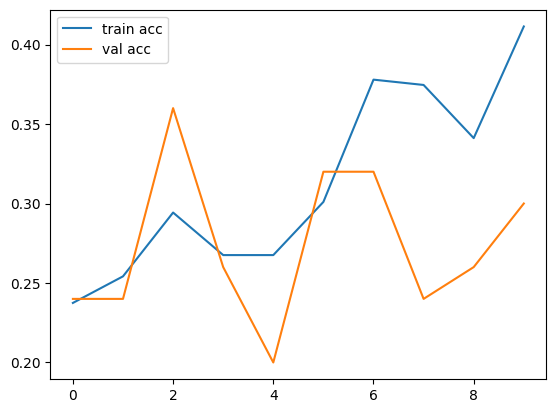

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:
y_pred = model.predict(test_set)

7/7 [==============================] - 16s 2s/step


In [ ]:
y_pred

array([[9.90391076e-01, 7.12988276e-06, 1.00988091e-03, 1.92413225e-07,
        4.75299498e-03, 6.75370160e-08, 1.17479101e-06, 6.46991612e-06,
        3.65238916e-03, 1.78563554e-04],
       [7.87356645e-02, 3.35098244e-02, 1.97057583e-04, 6.23173255e-05,
        2.33506411e-03, 2.49777338e-04, 3.00497741e-01, 1.06647816e-02,
        2.30211685e-06, 5.73745489e-01],
       [1.73054021e-02, 3.58593687e-02, 4.30043699e-04, 8.86256657e-06,
        5.85707556e-03, 1.47775805e-04, 8.60220373e-01, 1.64492114e-04,
        1.45843642e-05, 7.99920559e-02],
       [5.08622348e-01, 8.93994526e-04, 1.32042449e-03, 1.00612311e-07,
        2.36718304e-04, 9.48221932e-05, 1.21637117e-04, 4.46793139e-01,
        1.45815292e-07, 4.19166274e-02],
       [3.68806064e-01, 1.21161819e-01, 1.62136057e-04, 6.31370209e-03,
        1.61341915e-03, 6.79687946e-04, 3.63263518e-01, 1.89814940e-02,
        2.01088255e-06, 1.19016118e-01],
       [9.16686058e-01, 6.48702728e-04, 5.50134573e-05, 1.05429825e-08,
   

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 9, 6, 0, 0, 0, 9, 0, 0, 6, 0, 0, 9, 6, 6, 0, 9, 0, 0, 0, 0, 1,
       0, 6, 0, 0, 0, 0, 1, 0, 0, 9, 0, 0, 9, 0, 0, 9, 0, 6, 4, 1, 0, 6,
       9, 0, 0, 0, 0, 6])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')

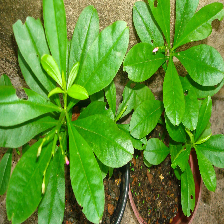

In [ ]:
img=image.load_img('/content/drive/MyDrive/Vegetable_Leaf_Recognition_dataset/Test_set/Talinum fruticosum (Waterleaf)/Waterleaf (3).JPG',target_size=(224,224))

img

In [ ]:
x=image.img_to_array(img)
x

array([[[ 85.,  83.,  35.],
        [105., 104.,  56.],
        [ 97.,  92.,  28.],
        ...,
        [181., 162., 122.],
        [174., 146.,  99.],
        [185., 171., 126.]],

       [[ 70.,  68.,  27.],
        [ 92.,  88.,  43.],
        [118., 118.,  64.],
        ...,
        [192., 177., 148.],
        [202., 181., 136.],
        [191., 178., 136.]],

       [[ 79.,  77.,  39.],
        [ 75.,  67.,  28.],
        [ 82.,  81.,  35.],
        ...,
        [189., 199., 139.],
        [188., 185., 144.],
        [174., 166., 119.]],

       ...,

       [[119., 113.,  81.],
        [121., 112.,  81.],
        [138., 126., 100.],
        ...,
        [132., 108.,  70.],
        [115.,  96.,  53.],
        [106.,  82.,  34.]],

       [[112., 103.,  74.],
        [130., 122.,  86.],
        [119., 112.,  84.],
        ...,
        [106.,  93.,  48.],
        [109.,  90.,  50.],
        [115.,  97.,  51.]],

       [[107., 102.,  72.],
        [122., 118.,  83.],
        [ 84.,  

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x=x/255

In [ ]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
img_data

array([[[[-103.80175 , -116.45351 , -123.346664],
         [-103.7194  , -116.371155, -123.268234],
         [-103.8292  , -116.41821 , -123.29961 ],
         ...,
         [-103.46057 , -116.14371 , -122.9702  ],
         [-103.550766, -116.20645 , -122.99765 ],
         [-103.444885, -116.10841 , -122.95451 ]],

        [[-103.83312 , -116.51233 , -123.40549 ],
         [-103.77038 , -116.4339  , -123.319214],
         [-103.68802 , -116.31625 , -123.217255],
         ...,
         [-103.35861 , -116.084885, -122.927055],
         [-103.40567 , -116.0692  , -122.88784 ],
         [-103.40567 , -116.08096 , -122.930984]],

        [[-103.786064, -116.477036, -123.37019 ],
         [-103.8292  , -116.51625 , -123.38588 ],
         [-103.80175 , -116.46135 , -123.35843 ],
         ...,
         [-103.393906, -115.998604, -122.93883 ],
         [-103.3743  , -116.05351 , -122.94275 ],
         [-103.472336, -116.12802 , -122.99765 ]],

        ...,

        [[-103.62135 , -116.33586 , -1

In [ ]:
model.predict(img_data)

1/1 [==============================] - 2s 2s/step


array([[4.1715740e-08, 2.7090589e-08, 9.9999857e-01, 1.0122265e-11,
        1.9671464e-09, 3.8197650e-16, 1.2779400e-11, 2.0444801e-08,
        1.0420291e-09, 1.4430138e-06]], dtype=float32)

In [ ]:
a=np.argmax(model.predict(img_data), axis=1)

1/1 [==============================] - 0s 190ms/step


In [ ]:
a==1

array([False])

In [ ]:
import tensorflow as tf

In [ ]:
tf.__version__

'2.2.0'